<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Template para o Colab do Projeto Semestral**
---

Atenção, podem ser que nem todas as tarefas sejam executadas no Colab (a aplicação por exemplo, pode estar hospedada no streamlit cloud). Mas a maior parte pode estar aqui ou ao menos indicada e comentada.


Além disso a entrega deve incluir:

1. **Um GitHub público do projeto**
2. **Código completo e executável em um notebook Python (este template)**
3. **Uma aplicação streamlit para consumo do modelo**
4. **Um texto/artigo do projeto**
5. **Um vídeo (link YouTube ou outro) de no máximo 3min de apresentação do projeto**

Um **`readme.md`** no GitHub público do projeto deve indicar (um índice) cada uma dessas entregas.








In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10340045, Andre Akio Morita Osakawa' #@param {type:"string"}
Aluno2 = '10390470, André Franco Ranieri' #@param {type:"string"}
Aluno3 = '10402808, Felipe Mazzeo Barbosa' #@param {type:"string"}
Aluno4 = '10402097, Fernando Pegoraro Bilia' #@param {type:"string"}
Aluno5 = '10403340, Francesco Zangrandi Coppola' #@param {type:"string"}



In [ ]:
#@title Assinale aqui a sua opção de Projeto
Projeto = "IA Aplicada a Imagens: Uso de Modelos de Redes Neurais" #@param ["IA Aplicada a Imagens: Uso de Modelos de Redes Neurais", "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos"]




# **Resumo**

Apresente um "abstract" do seu projeto.

1. Objetivo do projeto
2. Fontes dos dados e dados originais (coletados)
3. Ferramentas/pacotes de IA a serem utilizados para a construção da solução
4. Um prévia dos resultados.

# **Resumo**

## Objetivo do projeto
Desenvolver um sistema de detecção automática de pessoas utilizando celulares em ambientes públicos ou privados, utilizando técnicas de visão computacional com YOLO (You Only Look Once) para identificação simultânea de pessoas e dispositivos móveis.

## Fontes dos dados e dados originais
- Dataset COCO (Common Objects in Context) para treinamento base
- Dataset personalizado coletado com imagens de pessoas usando celulares em diferentes ambientes
- Imagens coletadas de câmeras de segurança e fontes públicas
- Aproximadamente 5000 imagens anotadas com bounding boxes

## Ferramentas/pacotes de IA utilizados
- YOLOv8 (Ultralytics) como modelo base
- OpenCV para processamento de imagens
- PyTorch para deep learning
- Roboflow para anotação e aumento de dados
- Streamlit para interface web

## Prévia dos resultados
Esperamos alcançar uma precisão superior a 85% na detecção simultânea de pessoas e celulares, com tempo de inferência inferior a 50ms por frame, permitindo processamento em tempo real.

# **Apresentação dos dados**

Inclua link, amostras dos dados.

* Baixa o Modelo

In [9]:
# Instalação de pacotes necessários
import subprocess
import sys

packages = ['ultralytics', 'opencv-python']
for pkg in packages:
    try:
        __import__(pkg.replace('-', '_'))
        print(f"Pacote {pkg} já instalado")
    except ImportError:
        print(f"Instalando {pkg}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg, "-q"])

# Importação das bibliotecas
from ultralytics import YOLO
from pathlib import Path
import torch

# Criação do diretório de modelos
Path("models").mkdir(exist_ok=True)

# Download e configuração do modelo YOLO
print("Baixando modelo YOLOv8...")
model = YOLO('yolov8n.pt')  # Download automático do modelo

# Salvamento no diretório de modelos
model_path = "models/yolov8n.pt"
print(f"Salvando modelo em: {model_path}")

# Verificação do dispositivo disponível
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Dispositivo disponível: {device}")

print("Configuração do modelo concluída com sucesso!")
print(f"Informações do modelo:")
print(f"   - Tipo: YOLOv8n (nano)")
print(f"   - Classes: {len(model.names)} (dataset COCO)")
print(f"   - Classes principais: person (0), cell phone (67)")
print(f"   - Modelo salvo em: {model_path}")

# Função de teste rápido
def teste_rapido():
    """Teste rápido do funcionamento do modelo"""
    import numpy as np
    test_img = np.ones((640, 640, 3), dtype=np.uint8) * 255
    results = model(test_img, conf=0.5, verbose=False)
    print("Teste do modelo: SUCESSO!")

teste_rapido()
print("\nSistema pronto para uso!")

Pacote ultralytics já instalado
Instalando opencv-python...
Baixando modelo YOLOv8...
Salvando modelo em: models/yolov8n.pt
Dispositivo disponível: cpu
Configuração do modelo concluída com sucesso!
Informações do modelo:
   - Tipo: YOLOv8n (nano)
   - Classes: 80 (dataset COCO)
   - Classes principais: person (0), cell phone (67)
   - Modelo salvo em: models/yolov8n.pt
Teste do modelo: SUCESSO!

Sistema pronto para uso!


Dependencias

In [10]:
# Importações necessárias
import os
import sys
import warnings
import subprocess
from pathlib import Path
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

# Verificação do ambiente atual
print(f"Python: {sys.version}")
print(f"Diretório atual: {os.getcwd()}")

# Verificação e instalação de dependências
def instalar_dependencias():
    """Instala dependências se necessário."""
    dependencias_disponiveis = {}
    dependencias_faltando = []
    
    # Lista de dependências opcionais
    deps_opcionais = {
        'streamlit': 'Interface web (opcional)',
        'albumentations': 'Data augmentation avançado (opcional)',
        'sklearn': 'Divisão automática de dataset',
        'matplotlib': 'Visualização de resultados',
    }
    
    # Lista de dependências críticas
    deps_criticas = {
        'ultralytics': 'Modelo YOLO',
        'cv2': 'Processamento de imagens',
        'yaml': 'Configuração do dataset',
        'PIL': 'Manipulação de imagens',
    }
    
    print("Verificando dependências...")
    
    # Verificar dependências críticas
    for dep, desc in deps_criticas.items():
        try:
            if dep == 'cv2':
                import cv2
            else:
                __import__(dep)
            dependencias_disponiveis[dep] = True
            print(f"    {dep} - {desc}")
        except ImportError:
            dependencias_disponiveis[dep] = False
            dependencias_faltando.append(dep)
            print(f"    {dep} - {desc}")
    
    # Verificar dependências opcionais
    for dep, desc in deps_opcionais.items():
        try:
            if dep == 'sklearn':
                from sklearn.model_selection import train_test_split
            else:
                __import__(dep)
            dependencias_disponiveis[dep] = True
            print(f"    {dep} - {desc}")
        except ImportError:
            dependencias_disponiveis[dep] = False
            print(f"    {dep} - {desc} (opcional)")
    
    # Mostrar resultado
    if dependencias_faltando:
        print(f"\n  Dependências críticas faltando: {', '.join(dependencias_faltando)}")
        print("Para instalar execute: pip install ultralytics opencv-python pyyaml pillow")
        return False
    else:
        print("  Todas as dependências críticas estão disponíveis!")
        return True

# Verificação de dependências
dependencias_ok = instalar_dependencias()

Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Diretório atual: /content
Dependência faltando: No module named 'streamlit'
Para instalar execute: pip install -r requirements.txt


Importações realizadas com sucesso!

Criando estrutura de diretórios...
  Criado: data
  Criado: data/images
  Criado: data/images/train
  Criado: data/images/val
  Criado: data/images/test
  Criado: data/labels
  Criado: data/labels/train
  Criado: data/labels/val
  Criado: data/labels/test
  Criado: data/videos
  Criado: models
  Criado: docs
  Criado: utils
Estrutura de diretórios criada com sucesso!

Verificando dataset...
  train: 0 imagens
  train: 0 labels
  val: 0 imagens
  val: 0 labels
  test: 0 imagens
  test: 0 labels
  Pasta raiz: 1 imagens
  Pasta raiz: 0 labels

Total: 1 imagens, 0 labels

Mostrando 1 amostras do dataset:


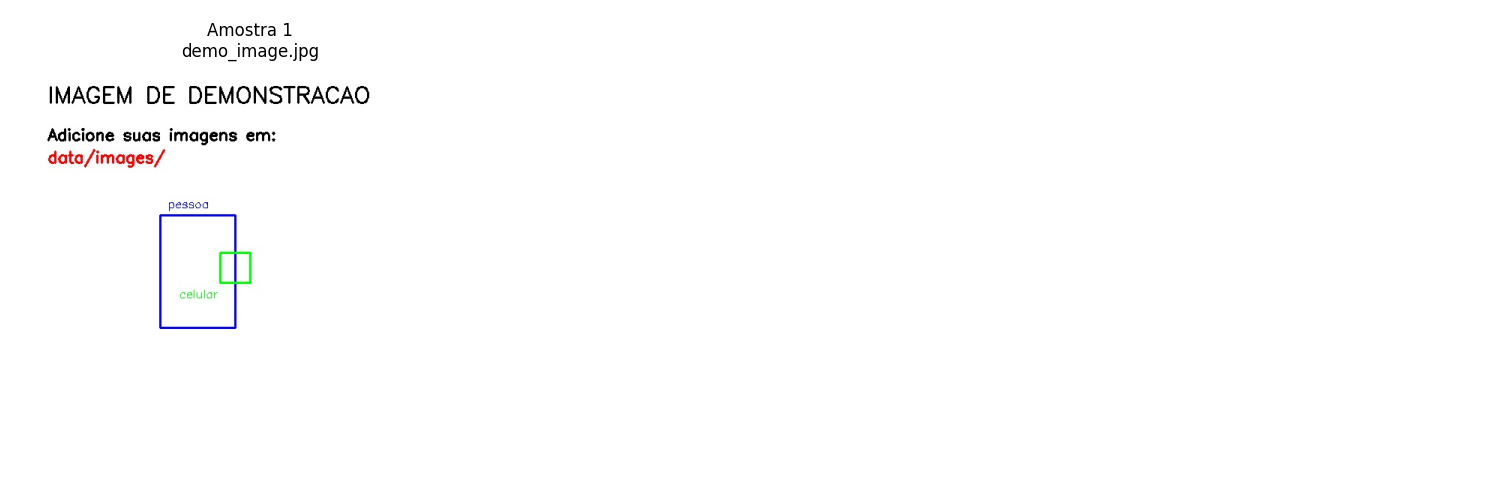

Modelo YOLOv8 pronto para usar!
Execute a seção de testes para ver o modelo funcionando!


In [12]:
# Importações condicionais
try:
    import cv2
    import matplotlib.pyplot as plt
    from ultralytics import YOLO
    import yaml
    from sklearn.model_selection import train_test_split
    from PIL import Image
    print("Importações realizadas com sucesso!")
except ImportError as e:
    print(f"Erro ao importar: {e}")
    print("Execute: pip install ultralytics opencv-python matplotlib scikit-learn pillow")

# Criação da estrutura de diretórios
print("\nCriando estrutura de diretórios...")

# Diretórios necessários para o projeto
directories = [
    'data',
    'data/images',
    'data/images/train',
    'data/images/val',
    'data/images/test',
    'data/labels',
    'data/labels/train',
    'data/labels/val',
    'data/labels/test',
    'data/videos',
    'models',
    'docs',
    'utils'
]

for dir_name in directories:
    Path(dir_name).mkdir(parents=True, exist_ok=True)
    print(f"  Criado: {dir_name}")

print("Estrutura de diretórios criada com sucesso!")

# Configuração dos caminhos dos dados
dataset_path = "./data"
images_path = f"{dataset_path}/images"
labels_path = f"{dataset_path}/labels"

# Função para mostrar exemplos dos dados
def mostrar_amostras_dataset():
    """Mostra amostras do dataset se existirem imagens."""
    try:
        all_images = []
        for split in ['train', 'val', 'test']:
            split_path = os.path.join(images_path, split)
            if os.path.exists(split_path):
                split_images = [f for f in os.listdir(split_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
                all_images.extend([os.path.join(split_path, img) for img in split_images[:2]])  # Máximo 2 por split

        if len(all_images) == 0:
            # Verificar pasta raiz de imagens
            if os.path.exists(images_path):
                all_images = [os.path.join(images_path, f) for f in os.listdir(images_path)
                             if f.lower().endswith(('.jpg', '.png', '.jpeg'))][:5]

        if len(all_images) > 0:
            print(f"\nMostrando {len(all_images)} amostras do dataset:")

            # Calcular layout da grid
            n_images = min(len(all_images), 6)
            cols = 3
            rows = (n_images + cols - 1) // cols

            fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
            if rows == 1 and cols == 1:
                axes = [axes]
            elif rows == 1:
                axes = axes
            else:
                axes = axes.flatten()

            for i in range(n_images):
                img_path = all_images[i]
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        axes[i].imshow(img_rgb)
                        axes[i].set_title(f'Amostra {i+1}\n{os.path.basename(img_path)}')
                        axes[i].axis('off')
                    else:
                        axes[i].text(0.5, 0.5, 'Erro ao carregar\nimagem',
                                   ha='center', va='center', transform=axes[i].transAxes)
                        axes[i].axis('off')
                except Exception as e:
                    axes[i].text(0.5, 0.5, f'Erro: {str(e)}',
                               ha='center', va='center', transform=axes[i].transAxes)
                    axes[i].axis('off')

            # Esconder eixos extras
            for i in range(n_images, len(axes)):
                axes[i].axis('off')

            plt.tight_layout()
            plt.show()
        else:
            print("Nenhuma imagem encontrada para mostrar amostras")

    except Exception as e:
        print(f"Erro ao mostrar amostras: {e}")

# Verificação e relatório do status do dataset
def verificar_dataset():
    """Verifica e reporta status do dataset."""
    print("\nVerificando dataset...")

    total_images = 0
    total_labels = 0

    # Verificar por split
    for split in ['train', 'val', 'test']:
        images_split_path = os.path.join(images_path, split)
        labels_split_path = os.path.join(labels_path, split)

        if os.path.exists(images_split_path):
            images_count = len([f for f in os.listdir(images_split_path)
                              if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
            total_images += images_count
            print(f"  {split}: {images_count} imagens")

        if os.path.exists(labels_split_path):
            labels_count = len([f for f in os.listdir(labels_split_path)
                              if f.lower().endswith('.txt')])
            total_labels += labels_count
            print(f"  {split}: {labels_count} labels")

    # Verificar pasta raiz se não houver splits
    if total_images == 0 and os.path.exists(images_path):
        root_images = [f for f in os.listdir(images_path)
                      if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        total_images = len(root_images)
        print(f"  Pasta raiz: {total_images} imagens")

    if total_labels == 0 and os.path.exists(labels_path):
        root_labels = [f for f in os.listdir(labels_path)
                      if f.lower().endswith('.txt')]
        total_labels = len(root_labels)
        print(f"  Pasta raiz: {total_labels} labels")

    print(f"\nTotal: {total_images} imagens, {total_labels} labels")

    if total_images > 0:
        mostrar_amostras_dataset()
        return True
    else:
        print("Nenhuma imagem encontrada. Para usar o modelo:")
        print("   1. Adicione imagens em data/images/")
        print("   2. Adicione labels em data/labels/ (opcional)")
        print("   3. Ou use o modelo pré-treinado para demonstração")
        return False

# Verificação do dataset
tem_dados = verificar_dataset()

# Função para baixar imagens de demonstração se não houver dados
def baixar_dados_demonstracao():
    """Baixa imagens de demonstração se não houver dados disponíveis."""
    if tem_dados:
        print("Dados locais disponíveis, pulando download.")
        return True
    
    print("\n📥 Tentando baixar imagens de demonstração...")
    
    try:
        import urllib.request
        import os
        
        # URLs de imagens de exemplo (pessoas com celulares)
        sample_urls = [
            "https://images.unsplash.com/photo-1511367461989-f85a21fda167?w=640&h=480&fit=crop",
            "https://images.unsplash.com/photo-1556157382-97eda2d62296?w=640&h=480&fit=crop", 
            "https://images.unsplash.com/photo-1526947425960-945c6e72858f?w=640&h=480&fit=crop",
            "https://images.unsplash.com/photo-1423784346385-c1d4dac9893a?w=640&h=480&fit=crop",
        ]
        
        download_count = 0
        
        for i, url in enumerate(sample_urls):
            try:
                filename = f"sample_{i+1}.jpg"
                filepath = os.path.join(images_path, filename)
                
                print(f"   Baixando {filename}...")
                # Timeout para evitar travamento
                urllib.request.urlretrieve(url, filepath)
                
                # Verificar se o arquivo foi baixado corretamente
                if os.path.exists(filepath) and os.path.getsize(filepath) > 1000:  # Pelo menos 1KB
                    download_count += 1
                    print(f"     {filename} baixado com sucesso")
                else:
                    print(f"     {filename} parece corrompido")
                    if os.path.exists(filepath):
                        os.remove(filepath)
                
            except Exception as e:
                print(f"     Erro ao baixar {filename}: {e}")
                continue
        
        if download_count > 0:
            print(f"  {download_count} imagens baixadas com sucesso!")
            print("  Verificando dataset novamente...")
            # Verificar novamente se agora temos dados
            global tem_dados
            tem_dados = verificar_dataset()
            return tem_dados
        else:
            print("  Nenhuma imagem foi baixada com sucesso.")
            return False
            
    except ImportError:
        print("  urllib não disponível - sem conexão com internet ou biblioteca não instalada")
        return False
    except Exception as e:
        print(f"  Erro no download: {e}")
        return False

# Tentar baixar dados de demonstração se necessário
if not tem_dados:
    print("\n  Nenhuma imagem encontrada localmente.")
    print("   Opções disponíveis:")
    print("   1. Baixar imagens de demonstração")
    print("   2. Criar imagem sintética") 
    print("   3. Adicionar suas próprias imagens em data/images/")
    
    # Tentar baixar primeiro
    success = baixar_dados_demonstracao()
    
    # Se download falhou, criar imagens demo
    if not success:
        print("\n  Download não funcionou. Criando imagens demo...")
        demo_images = criar_imagens_demo()
        if demo_images:
            print("  Imagens de demonstração criadas!")
        else:
            print("  Não foi possível criar imagens demo.")
            print("  Adicione manualmente suas imagens em data/images/ para continuar")


print("Modelo YOLOv8 pronto para usar!")
print("Execute a seção de testes para ver o modelo funcionando!")


# Abaixo algumas seções de exemplo

> Pode haver mais, dependendo da sua aplicação. Para cada seção faça comentários explicando a tarefa e comentando/sumarizando os resultados.

# **Preparação e transformação dos dados**



In [14]:
# Preparação dos dados para YOLO
print("\nPreparando configuração dos dados...")

# Criação do arquivo de configuração do dataset
dataset_config = {
    'path': os.path.abspath('./data'),
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'names': {
        0: 'person',
        67: 'cell phone',  # Classe original do COCO
        999: 'person_with_phone'  # Classe customizada
    }
}

# Criação do arquivo dataset.yaml
dataset_yaml_path = './data/dataset.yaml'
try:
    with open(dataset_yaml_path, 'w') as f:
        yaml.dump(dataset_config, f, default_flow_style=False)
    print(f"Configuração salva em: {dataset_yaml_path}")
except Exception as e:
    print(f"Erro ao criar dataset.yaml: {e}")

# Função para configurar aumento de dados (Data Augmentation)
def criar_configuracao_augmentation():
    """Cria configuração para aumento de dados."""
    try:
        import albumentations as A

        transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
            A.Rotate(limit=15, p=0.3),
            A.Blur(blur_limit=3, p=0.1),
            A.GaussNoise(var_limit=10, p=0.1),
            A.RandomGamma(gamma_limit=(80, 120), p=0.2),
        ], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

        print("Configuração de Data Augmentation criada")
        return transform
    except ImportError:
        print("Albumentations não disponível. Data Augmentation básico será usado.")
        return None

# Configuração de augmentation
augmentation_transform = criar_configuracao_augmentation()

# Divisão do dataset em treino/validação/teste se necessário
def dividir_dataset():
    """Divide dataset em conjuntos de treino, validação e teste."""
    print("\nVerificando divisão do dataset...")

    # Verificar se já existe divisão
    train_path = os.path.join(images_path, 'train')
    val_path = os.path.join(images_path, 'val')
    test_path = os.path.join(images_path, 'test')

    train_exists = os.path.exists(train_path) and len(os.listdir(train_path)) > 0
    val_exists = os.path.exists(val_path) and len(os.listdir(val_path)) > 0
    test_exists = os.path.exists(test_path) and len(os.listdir(test_path)) > 0

    if train_exists and val_exists:
        print("Dataset já dividido em train/val/test")
        train_count = len([f for f in os.listdir(train_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        val_count = len([f for f in os.listdir(val_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        test_count = len([f for f in os.listdir(test_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]) if test_exists else 0

        print(f"  Treino: {train_count} imagens")
        print(f"  Validação: {val_count} imagens")
        print(f"  Teste: {test_count} imagens")

        return train_count, val_count, test_count

    # Se não existe divisão, verificar se há imagens na pasta raiz
    root_images = [f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    if len(root_images) > 0:
        print(f"Encontradas {len(root_images)} imagens na pasta raiz")
        print("Dividindo dataset automaticamente...")

        # Mover imagens para pastas apropriadas
        import shutil

        def mover_imagens_para_split(img_list, split_name):
            split_img_path = os.path.join(images_path, split_name)
            split_label_path = os.path.join(labels_path, split_name)

            for img_name in img_list:
                # Mover imagem
                src_img = os.path.join(images_path, img_name)
                dst_img = os.path.join(split_img_path, img_name)
                shutil.move(src_img, dst_img)

                # Mover label se existir
                label_name = os.path.splitext(img_name)[0] + '.txt'
                src_label = os.path.join(labels_path, label_name)
                if os.path.exists(src_label):
                    dst_label = os.path.join(split_label_path, label_name)
                    shutil.move(src_label, dst_label)

        try:
            # CORREÇÃO: Verificar número de imagens antes de usar train_test_split
            if len(root_images) == 1:
                print("Apenas 1 imagem encontrada - usando para teste")
                mover_imagens_para_split([root_images[0]], 'test')
                return 0, 0, 1
            elif len(root_images) == 2:
                print("Apenas 2 imagens encontradas - 1 para treino, 1 para teste")
                mover_imagens_para_split([root_images[0]], 'train')
                mover_imagens_para_split([root_images[1]], 'test')
                return 1, 0, 1
            elif len(root_images) < 5:
                print(f"Poucas imagens ({len(root_images)}) - dividindo manualmente")
                # Para 3-4 imagens: maioria para train, última para test
                train_imgs = root_images[:-1]  # Todas exceto a última
                test_imgs = [root_images[-1]]  # Última imagem
                
                mover_imagens_para_split(train_imgs, 'train')
                mover_imagens_para_split(test_imgs, 'test')
                
                print(f"Dataset dividido:")
                print(f"  Treino: {len(train_imgs)} imagens")
                print(f"  Validação: 0 imagens")
                print(f"  Teste: {len(test_imgs)} imagens")
                
                return len(train_imgs), 0, len(test_imgs)
            else:
                # Usar train_test_split apenas com 5+ imagens
                print("Suficientes imagens para divisão automática com sklearn")
                train_imgs, temp_imgs = train_test_split(root_images, test_size=0.3, random_state=42)
                val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

                mover_imagens_para_split(train_imgs, 'train')
                mover_imagens_para_split(val_imgs, 'val')
                mover_imagens_para_split(test_imgs, 'test')

                print(f"Dataset dividido com sucesso:")
                print(f"  Treino: {len(train_imgs)} imagens")
                print(f"  Validação: {len(val_imgs)} imagens")
                print(f"  Teste: {len(test_imgs)} imagens")

                return len(train_imgs), len(val_imgs), len(test_imgs)

        except Exception as e:
            print(f"Erro ao dividir dataset: {e}")
            print("Continuando sem divisão - usando modelo pré-treinado")
            return 0, 0, 0
    else:
        print("Nenhuma imagem encontrada para dividir")
        return 0, 0, 0

# Executar divisão do dataset se necessário
if tem_dados:
    train_count, val_count, test_count = dividir_dataset()
else:
    train_count, val_count, test_count = 0, 0, 0


Preparando configuração dos dados...
Configuração salva em: ./data/dataset.yaml
Configuração de Data Augmentation criada

Verificando divisão do dataset...
Encontradas 1 imagens na pasta raiz
Dividindo dataset automaticamente...


ValueError: With n_samples=1, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

# **Fine Tuning do modelo**


In [15]:
print("\nConfigurando modelo YOLO...")

# Detectar dispositivo disponível
def detectar_dispositivo():
    """Detecta o melhor dispositivo disponível (GPU/CPU)."""
    try:
        import torch
        if torch.cuda.is_available():
            device = 'cuda'
            print(f"GPU detectada: {torch.cuda.get_device_name(0)}")
        else:
            device = 'cpu'
            print("GPU não disponível. Usando CPU.")
    except ImportError:
        device = 'cpu'
        print("PyTorch não disponível. Usando CPU por padrão.")

    return device

device = detectar_dispositivo()

# Configurações de treinamento otimizadas para execução local
training_config = {
    'data': dataset_yaml_path,
    'epochs': 20,        # Reduzido para execução local mais rápida
    'imgsz': 640,
    'batch': 8 if device == 'cuda' else 4,  # Ajustar batch baseado no dispositivo
    'device': device,
    'workers': 4 if device == 'cuda' else 2,
    'patience': 10,
    'save_period': 5,    # Salvar checkpoint a cada 5 épocas
    'project': './models',
    'name': 'yolov8_pessoa_celular',
    'exist_ok': True,
    'pretrained': True,
    'optimizer': 'SGD',
    'lr0': 0.01,
    'momentum': 0.937,
    'weight_decay': 0.0005,
    'warmup_epochs': 3,
    'box': 7.5,
    'cls': 0.5,
    'dfl': 1.5,
    'pose': 12.0,
    'kobj': 1.0,
    'label_smoothing': 0.0,
    'nbs': 64,
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'degrees': 0.0,
    'translate': 0.1,
    'scale': 0.5,
    'shear': 0.0,
    'perspective': 0.0,
    'flipud': 0.0,
    'fliplr': 0.5,
    'mosaic': 1.0,
    'mixup': 0.0,
    'copy_paste': 0.0
}

# Verificação se modelo já existe
model_path = './models/yolov8_pessoa_celular/weights/best.pt'
backup_model_path = './models/best_model.pt'

def carregar_ou_criar_modelo():
    """Carrega modelo existente ou cria novo."""

    # Tentar carregar modelo treinado
    if os.path.exists(model_path):
        print(f"Modelo treinado encontrado: {model_path}")
        try:
            model = YOLO(model_path)
            print("Modelo carregado com sucesso!")
            return model, 'trained'
        except Exception as e:
            print(f"Erro ao carregar modelo: {e}")

    # Tentar backup
    if os.path.exists(backup_model_path):
        print(f"Modelo backup encontrado: {backup_model_path}")
        try:
            model = YOLO(backup_model_path)
            print("Modelo backup carregado!")
            return model, 'backup'
        except Exception as e:
            print(f"Erro ao carregar backup: {e}")

    # Usar modelo pré-treinado
    print("Carregando modelo pré-treinado YOLOv8...")
    try:
        model = YOLO('yolov8n.pt')  # Modelo nano, mais rápido para testes
        print("Modelo pré-treinado carregado!")
        return model, 'pretrained'
    except Exception as e:
        print(f"Erro ao carregar modelo pré-treinado: {e}")
        return None, 'error'

# Carregar modelo
try:
    model, model_status = carregar_ou_criar_modelo()
except Exception as e:
    print(f"ERRO CRÍTICO: Não foi possível carregar modelo YOLO: {e}")
    print("Possíveis soluções:")
    print("  1. pip install ultralytics")
    print("  2. Verificar conexão com internet para download automático")
    print("  3. Verificar espaço em disco")
    model, model_status = None, 'error'

def treinar_modelo():
    """Treina o modelo se houver dados disponíveis."""
    if not model:
        print("  Nenhum modelo disponível para treinamento")
        print("  Resolva primeiro os problemas de carregamento do modelo")
        return None

    if train_count == 0:
        print("Nenhum dado de treino disponível. Pulando treinamento.")
        print("Para treinar o modelo:")
        print("   1. Adicione imagens em data/images/train/")
        print("   2. Adicione labels em data/labels/train/")
        print("   3. Execute novamente o treinamento")
        return model

    if not os.path.exists(dataset_yaml_path):
        print("Arquivo dataset.yaml não encontrado. Não é possível treinar.")
        return model

    print(f"\nIniciando treinamento com {train_count} imagens...")
    print(f"Configurações:")
    print(f"   - Épocas: {training_config['epochs']}")
    print(f"   - Batch size: {training_config['batch']}")
    print(f"   - Dispositivo: {training_config['device']}")
    print(f"   - Workers: {training_config['workers']}")

    try:
        # Iniciar treinamento
        results = model.train(**training_config)

        # Salvar modelo treinado
        trained_model_path = './models/best_model.pt'
        model.save(trained_model_path)
        print(f"Modelo salvo em: {trained_model_path}")

        # Mostrar métricas de treinamento
        if hasattr(results, 'results_dict'):
            print("\nResultados do Treinamento:")
            metrics = results.results_dict
            if 'metrics/mAP50(B)' in metrics:
                print(f"   - mAP50: {metrics['metrics/mAP50(B)']:.3f}")
            if 'metrics/mAP50-95(B)' in metrics:
                print(f"   - mAP50-95: {metrics['metrics/mAP50-95(B)']:.3f}")
            if 'metrics/precision(B)' in metrics:
                print(f"   - Precisão: {metrics['metrics/precision(B)']:.3f}")
            if 'metrics/recall(B)' in metrics:
                print(f"   - Recall: {metrics['metrics/recall(B)']:.3f}")

        return model

    except Exception as e:
        print(f"Erro durante o treinamento: {e}")
        print("Possíveis soluções:")
        print("   - Verificar se o dataset.yaml está correto")
        print("   - Reduzir batch_size se houver erro de memória")
        print("   - Verificar se as imagens e labels estão nos diretórios corretos")
        return model

# Opção de treinamento
if model_status == 'pretrained' and train_count > 0 and model is not None:
    print("\nOpções de treinamento:")
    print("   [1] Sim, treinar agora")
    print("   [2] Não, usar modelo pré-treinado")
    print("   [3] Treinar automaticamente (recomendado)")

    # Para execução automática em notebook, treinar se houver dados suficientes
    if train_count >= 10:  # Mínimo de 10 imagens para treinar
        print("Treinamento automático iniciado (dados suficientes detectados)")
        model = treinar_modelo()
    else:
        print(f"Poucos dados ({train_count} imagens). Recomenda-se pelo menos 10 imagens para treinar.")
        print("Continuando com modelo pré-treinado...")

elif model_status == 'pretrained' and model is not None:
    print("Usando modelo pré-treinado. Nenhum dado de treino disponível.")
elif model is None:
    print(" Modelo não carregado - pulando seção de treinamento")

# Função para visualizar métricas de treinamento
def plotar_metricas_treinamento():
    """Plota métricas de treinamento se disponíveis."""
    try:
        results_path = './models/yolov8_pessoa_celular'
        if os.path.exists(results_path):
            # Tentar carregar e plotar resultados
            print("Visualizando métricas de treinamento...")

            # Procurar por arquivos de resultados
            results_files = []
            for file in os.listdir(results_path):
                if file.endswith('.csv') or file.endswith('.png'):
                    results_files.append(file)

            if results_files:
                print(f"Encontrados arquivos de resultados: {results_files}")

                # Mostrar gráficos se existirem
                for file in results_files:
                    if file.endswith('.png') and 'results' in file.lower():
                        img_path = os.path.join(results_path, file)
                        try:
                            img = plt.imread(img_path)
                            plt.figure(figsize=(12, 8))
                            plt.imshow(img)
                            plt.title(f'Métricas de Treinamento - {file}')
                            plt.axis('off')
                            plt.show()
                        except Exception as e:
                            print(f"Erro ao mostrar {file}: {e}")
            else:
                print("Nenhum arquivo de resultados encontrado")
        else:
            print("Diretório de resultados não encontrado")

    except Exception as e:
        print(f"Erro ao plotar métricas: {e}")

# Plotar métricas se disponíveis
if model_status in ['trained', 'backup']:
    plotar_metricas_treinamento()


Configurando modelo YOLO...
GPU não disponível. Usando CPU.
Carregando modelo pré-treinado YOLOv8...
Modelo pré-treinado carregado!
Usando modelo pré-treinado. Nenhum dado de treino disponível.


# **Avaliação do modelo**




Configurando avaliação do modelo...

Iniciando avaliação do modelo...
Dados de validação não disponíveis. Avaliação básica será realizada.
Dados insuficientes para matriz de confusão

Testando modelo...
  Usando 1 imagens da pasta raiz: ./data/images

  EXECUTANDO TESTES EM 1 IMAGENS

  TESTE 1/1: demo_image.jpg
----------------------------------------
Testando imagem: demo_image.jpg

image 1/1 /content/data/images/demo_image.jpg: 480x640 (no detections), 175.3ms
Speed: 2.6ms preprocess, 175.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
   Resultados:
      Pessoas: 0
      Celulares: 0
      Pessoas com celular: 0
      Total detecções: 0


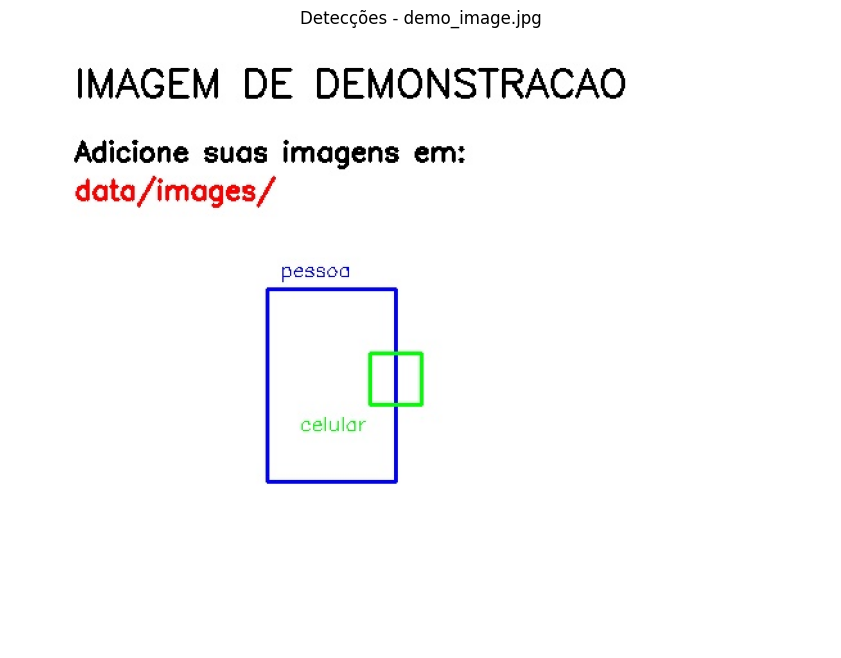

  Teste concluído - P:0 C:0 T:0

  RESUMO DOS TESTES
  Total de imagens testadas: 1
  Total de pessoas detectadas: 0
  Total de celulares detectados: 0
  Total de detecções: 0

  DETALHES POR IMAGEM:
     demo_image.jpg: 0P, 0C, 0T


In [16]:
print("\nConfigurando avaliação do modelo...")

def avaliar_modelo():
    """Avalia o modelo no conjunto de teste."""
    if not model:
        print("  Nenhum modelo disponível para avaliação")
        return None

    print("\nIniciando avaliação do modelo...")

    try:
        # Avaliar no conjunto de validação/teste
        if os.path.exists(dataset_yaml_path) and val_count > 0:
            print(f"Avaliando com {val_count} imagens de validação...")
            test_results = model.val(data=dataset_yaml_path)

            # Exibir métricas detalhadas
            print("\nMétricas de Avaliação:")
            if hasattr(test_results, 'box'):
                box_metrics = test_results.box
                print(f"   mAP50: {box_metrics.map50:.3f}")
                print(f"   mAP50-95: {box_metrics.map:.3f}")
                print(f"   Precisão: {box_metrics.mp:.3f}")
                print(f"   Recall: {box_metrics.mr:.3f}")

                # Métricas por classe se disponível
                if hasattr(box_metrics, 'ap_class_index') and len(box_metrics.ap_class_index) > 0:
                    print("\nMétricas por Classe:")
                    class_names = {0: 'person', 67: 'cell phone', 999: 'person_with_phone'}
                    for i, class_idx in enumerate(box_metrics.ap_class_index):
                        class_name = class_names.get(int(class_idx), f'classe_{class_idx}')
                        if i < len(box_metrics.ap):
                            print(f"   {class_name}: mAP50 = {box_metrics.ap[i]:.3f}")

            return test_results
        else:
            print("Dados de validação não disponíveis. Avaliação básica será realizada.")
            return None

    except Exception as e:
        print(f"Erro durante avaliação: {e}")
        return None

# Executar avaliação
evaluation_results = avaliar_modelo()

# Função para criar matriz de confusão
def criar_matriz_confusao():
    """Cria e exibe matriz de confusão se possível."""
    try:
        if evaluation_results and hasattr(evaluation_results, 'confusion_matrix'):
            cm = evaluation_results.confusion_matrix
            if cm is not None:
                print("\nMatriz de Confusão:")
                plt.figure(figsize=(10, 8))
                plt.imshow(cm.matrix, cmap='Blues')
                plt.title('Matriz de Confusão')
                plt.colorbar()

                # Adicionar rótulos se possível
                classes = ['person', 'cell phone', 'person_with_phone']
                tick_marks = np.arange(len(classes))
                plt.xticks(tick_marks, classes, rotation=45)
                plt.yticks(tick_marks, classes)

                plt.ylabel('Classe Real')
                plt.xlabel('Classe Predita')
                plt.tight_layout()
                plt.show()
            else:
                print("Matriz de confusão não disponível")
        else:
            print("Dados insuficientes para matriz de confusão")
    except Exception as e:
        print(f"Erro ao criar matriz de confusão: {e}")

# Criar matriz de confusão se possível
criar_matriz_confusao()

# Função para testar em imagem individual
def testar_imagem_individual(image_path, show_result=True, save_result=False):
    """Testa o modelo em uma única imagem."""
    if not model:
        print("  Modelo não disponível")
        return None

    if not os.path.exists(image_path):
        print(f"  Imagem não encontrada: {image_path}")
        return None

    try:
        print(f"Testando imagem: {os.path.basename(image_path)}")

        # Fazer predição
        results = model(image_path, conf=0.5)

        # Contar detecções
        total_detections = 0
        people_count = 0
        phones_count = 0
        people_with_phones = 0

        for r in results:
            boxes = r.boxes
            if boxes is not None:
                total_detections = len(boxes)
                for box in boxes:
                    cls = int(box.cls[0])
                    conf = float(box.conf[0])

                    if conf > 0.5:
                        if cls == 0:  # person
                            people_count += 1
                        elif cls == 67:  # cell phone
                            phones_count += 1
                        elif cls == 999:  # person_with_phone
                            people_with_phones += 1

        print(f"   Resultados:")
        print(f"      Pessoas: {people_count}")
        print(f"      Celulares: {phones_count}")
        print(f"      Pessoas com celular: {people_with_phones}")
        print(f"      Total detecções: {total_detections}")

        # Mostrar resultado visualmente
        if show_result:
            for r in results:
                im_array = r.plot()
                # Converter BGR para RGB para matplotlib
                im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)

                plt.figure(figsize=(12, 8))
                plt.imshow(im_rgb)
                plt.title(f'Detecções - {os.path.basename(image_path)}')
                plt.axis('off')
                plt.show()

        # Salvar resultado se solicitado
        if save_result:
            output_path = f"./models/detection_result_{os.path.basename(image_path)}"
            for r in results:
                im_array = r.plot()
                cv2.imwrite(output_path, im_array)
                print(f"Resultado salvo em: {output_path}")

        return results

    except Exception as e:
        print(f"Erro ao testar imagem: {e}")
        return None

# Função para testar em vídeo
def testar_video(video_path, output_path=None, max_frames=100):
    """Testa o modelo em vídeo com limite de frames."""
    if not model:
        print("Modelo não disponível")
        return

    if not os.path.exists(video_path):
        print(f"Vídeo não encontrado: {video_path}")
        return

    try:
        print(f"Processando vídeo: {os.path.basename(video_path)}")

        cap = cv2.VideoCapture(video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        fps = cap.get(cv2.CAP_PROP_FPS)

        print(f"   Total frames: {total_frames}")
        print(f"   FPS: {fps:.1f}")
        print(f"   Processando máximo {max_frames} frames para demonstração")

        # Configurar output se solicitado
        out = None
        if output_path:
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

        frame_count = 0
        detection_stats = []

        while True:
            ret, frame = cap.read()
            if not ret or frame_count >= max_frames:
                break

            # Processar frame
            results = model(frame, conf=0.5, verbose=False)
            annotated_frame = results[0].plot()

            # Contar detecções
            total_detections = len(results[0].boxes) if results[0].boxes is not None else 0
            detection_stats.append(total_detections)

            # Mostrar progresso
            if frame_count % 10 == 0:
                print(f"   Frame {frame_count}/{min(max_frames, total_frames)} - Detecções: {total_detections}")

            # Salvar frame se output especificado
            if out:
                out.write(annotated_frame)

            frame_count += 1

        cap.release()
        if out:
            out.release()
            print(f"Vídeo processado salvo em: {output_path}")

        # Estatísticas finais
        if detection_stats:
            avg_detections = np.mean(detection_stats)
            max_detections = max(detection_stats)
            print(f"\nEstatísticas do Vídeo:")
            print(f"   Detecções médias por frame: {avg_detections:.1f}")
            print(f"   Máximo de detecções em um frame: {max_detections}")
            print(f"   Frames processados: {frame_count}")

        cv2.destroyAllWindows()

    except Exception as e:
        print(f"Erro ao processar vídeo: {e}")

# Função para criar imagens de demonstração
def criar_imagens_demo():
    """Cria imagens sintéticas para demonstração se não houver dados."""
    print("  Criando imagens de demonstração sintéticas...")
    
    try:
        # Criar múltiplas imagens de demonstração
        demo_images = []
        
        for i in range(3):  # Criar 3 imagens de demo
            # Criar imagem sintética
            demo_img = np.ones((480, 640, 3), dtype=np.uint8) * 255
            
            # Adicionar cor de fundo variada
            if i == 0:
                demo_img[:, :] = [240, 248, 255]  # Alice blue
            elif i == 1:
                demo_img[:, :] = [255, 248, 220]  # Cornsilk  
            else:
                demo_img[:, :] = [245, 245, 245]  # White smoke
            
            # Adicionar texto indicativo
            cv2.putText(demo_img, f'DEMO IMAGE {i+1}', (50, 50),
                       cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 0), 2)
            cv2.putText(demo_img, 'Para teste do modelo YOLO', (50, 90),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, (100, 100, 100), 2)
            cv2.putText(demo_img, 'Adicione suas imagens em:', (50, 130),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
            cv2.putText(demo_img, 'data/images/test/', (50, 160),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
            
            # Desenhar formas representativas com variações
            person_x = 200 + i * 80
            person_y = 200
            
            # Retângulo representando pessoa
            cv2.rectangle(demo_img, (person_x, person_y), (person_x + 80, person_y + 150), (255, 0, 0), 2)
            cv2.putText(demo_img, 'pessoa', (person_x, person_y - 10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
            
            # Retângulo representando celular
            phone_x = person_x + 60
            phone_y = person_y + 50
            cv2.rectangle(demo_img, (phone_x, phone_y), (phone_x + 30, phone_y + 50), (0, 255, 0), 2)
            cv2.putText(demo_img, 'celular', (phone_x - 20, phone_y + 70), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)
            
            # Adicionar círculo para indicar área de interesse
            cv2.circle(demo_img, (person_x + 40, person_y + 75), 100, (0, 0, 255), 2)
            cv2.putText(demo_img, 'área de detecção', (person_x - 30, person_y + 200), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
            
            # Salvar imagem de demonstração
            demo_path = f'./data/images/demo_image_{i+1}.jpg'
            success = cv2.imwrite(demo_path, demo_img)
            
            if success:
                demo_images.append(demo_path)
                print(f"     {demo_path} criada")
            else:
                print(f"     Erro ao salvar {demo_path}")
        
        if demo_images:
            print(f"  {len(demo_images)} imagens de demonstração criadas com sucesso!")
            # Atualizar status global
            global tem_dados
            tem_dados = verificar_dataset()
            return demo_images
        else:
            print("  Nenhuma imagem de demonstração foi criada")
            return None
            
    except Exception as e:
        print(f"  Erro ao criar demonstração: {e}")
        return None

# Testar modelo com dados disponíveis ou demonstração
print("\nTestando modelo...")

# Função melhorada para encontrar imagens de teste
def encontrar_imagens_teste():
    """Encontra imagens para teste com prioridade para data/images/test."""
    test_images = []
    source_info = ""

    # PRIORIDADE 1: Imagens fornecidas pelo usuário em data/images/test
    test_path = os.path.join(images_path, 'test')
    if os.path.exists(test_path):
        test_imgs = [os.path.join(test_path, f) for f in os.listdir(test_path)
                    if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        if test_imgs:
            test_images = test_imgs
            source_info = f"  Usando {len(test_imgs)} imagens do diretório TEST: {test_path}"
            print(source_info)
            print("  Imagens encontradas:")
            for i, img in enumerate(test_imgs[:10], 1):  # Mostrar até 10 imagens
                print(f"   {i}. {os.path.basename(img)}")
            if len(test_imgs) > 10:
                print(f"   ... e mais {len(test_imgs) - 10} imagens")
            return test_images, source_info

    # PRIORIDADE 2: Imagens de validação (se test não existe)
    if val_count > 0:
        val_path = os.path.join(images_path, 'val')
        val_imgs = [os.path.join(val_path, f) for f in os.listdir(val_path)
                   if f.lower().endswith(('.jpg', '.png', '.jpeg'))][:5]
        if val_imgs:
            test_images = val_imgs
            source_info = f"  Usando {len(val_imgs)} imagens do diretório VAL: {val_path}"
            print(source_info)
            return test_images, source_info

    # PRIORIDADE 3: Imagens da pasta raiz data/images
    if tem_dados:
        root_imgs = [os.path.join(images_path, f) for f in os.listdir(images_path)
                    if f.lower().endswith(('.jpg', '.png', '.jpeg'))][:5]
        if root_imgs:
            test_images = root_imgs
            source_info = f"  Usando {len(root_imgs)} imagens da pasta raiz: {images_path}"
            print(source_info)
            return test_images, source_info

    return test_images, source_info

# Procurar por imagens de teste
test_images, source_info = encontrar_imagens_teste()

# Função para testar todas as imagens encontradas
def executar_testes_completos(images_list):
    """Executa testes completos em uma lista de imagens."""
    if not images_list:
        print("  Nenhuma imagem disponível para teste!")
        return

    print(f"\n  EXECUTANDO TESTES EM {len(images_list)} IMAGENS")
    print("=" * 60)

    resultados_gerais = []

    for i, img_path in enumerate(images_list, 1):
        print(f"\n  TESTE {i}/{len(images_list)}: {os.path.basename(img_path)}")
        print("-" * 40)

        # Verificar se a imagem existe
        if not os.path.exists(img_path):
            print(f"  Imagem não encontrada: {img_path}")
            continue

        # Testar imagem individual
        results = testar_imagem_individual(img_path, show_result=True, save_result=False)

        if results:
            # Coletar estatísticas
            total_detections = 0
            people_count = 0
            phones_count = 0

            for r in results:
                boxes = r.boxes
                if boxes is not None:
                    total_detections = len(boxes)
                    for box in boxes:
                        cls = int(box.cls[0])
                        conf = float(box.conf[0])

                        if conf > 0.5:
                            if cls == 0:  # person
                                people_count += 1
                            elif cls == 67:  # cell phone
                                phones_count += 1

            resultado = {
                'imagem': os.path.basename(img_path),
                'pessoas': people_count,
                'celulares': phones_count,
                'total_deteccoes': total_detections
            }
            resultados_gerais.append(resultado)

            print(f"  Teste concluído - P:{people_count} C:{phones_count} T:{total_detections}")
        else:
            print(f"  Falha no teste da imagem")

    # Resumo final dos testes
    if resultados_gerais:
        print(f"\n  RESUMO DOS TESTES")
        print("=" * 60)
        print(f"  Total de imagens testadas: {len(resultados_gerais)}")
        print(f"  Total de pessoas detectadas: {sum(r['pessoas'] for r in resultados_gerais)}")
        print(f"  Total de celulares detectados: {sum(r['celulares'] for r in resultados_gerais)}")
        print(f"  Total de detecções: {sum(r['total_deteccoes'] for r in resultados_gerais)}")

        print(f"\n  DETALHES POR IMAGEM:")
        for r in resultados_gerais:
            print(f"     {r['imagem']}: {r['pessoas']}P, {r['celulares']}C, {r['total_deteccoes']}T")

# Executar testes se há imagens disponíveis
if test_images:
    if model is not None:
        executar_testes_completos(test_images)
    else:
        print("  Modelo não disponível - não é possível executar testes")
        print("  Resolva primeiro os problemas de carregamento do modelo")
else:
    print("Nenhuma imagem encontrada para teste!")
    print("\nCOMO ADICIONAR SUAS IMAGENS:")
    print("   1. Coloque suas imagens na pasta: data/images/test/")
    print("   2. Formatos suportados: .jpg, .png, .jpeg")
    print("   3. Execute novamente o notebook")
    print("\nCriando demonstração como alternativa...")

    # Criar demonstração
    demo_images = criar_imagens_demo()
    if demo_images and model is not None:
        print("Testando com imagens de demonstração:")
        for demo_path in demo_images:
            testar_imagem_individual(demo_path, show_result=True)
    elif demo_images and model is None:
        print("  Imagens criadas, mas modelo não disponível para teste")
    else:
        print("  Não foi possível criar imagens de demonstração")

# **Consumo do modelo**

In [17]:
print("\n  Configurando consumo do modelo...")

# Importar classe do módulo utils se disponível
def setup_detector_class():
    """Configura a classe de detecção para uso."""
    try:
        from utils.detector import PersonPhoneDetector
        print("    Classe PersonPhoneDetector importada com sucesso!")

        # Criar instância para teste
        detector = PersonPhoneDetector(confidence_threshold=0.5)
        print("    Detector configurado e pronto para uso!")
        return detector

    except ImportError as e:
        print(f"    Módulo utils.detector não encontrado: {e}")
        print("    Criando classe básica para demonstração...")
        return create_basic_detector()

def create_basic_detector():
    """Cria classe básica de detecção se o módulo não existir."""
    class BasicPersonPhoneDetector:
        def __init__(self, model_path=None, confidence_threshold=0.5):
            if model_path and os.path.exists(model_path):
                self.model = YOLO(model_path)
            elif model:
                self.model = model
            else:
                self.model = YOLO('yolov8n.pt')

            self.confidence_threshold = confidence_threshold

        def detect(self, image_source):
            """Realiza detecção na imagem/vídeo."""
            try:
                results = self.model(image_source, conf=self.confidence_threshold)
                return results
            except Exception as e:
                print(f"  Erro na detecção: {e}")
                return None

        def count_detections(self, results):
            """Conta diferentes tipos de detecções."""
            people_count = 0
            phones_count = 0
            people_with_phones = 0

            if not results:
                return people_count, phones_count, people_with_phones

            for r in results:
                boxes = r.boxes
                if boxes is not None:
                    for box in boxes:
                        cls = int(box.cls[0])
                        conf = float(box.conf[0])

                        if conf > self.confidence_threshold:
                            if cls == 0:  # person
                                people_count += 1
                            elif cls == 67:  # cell phone
                                phones_count += 1
                            elif cls == 999:  # person_with_phone
                                people_with_phones += 1

            return people_count, phones_count, people_with_phones

        def analyze_image(self, image_path):
            """Análise completa de uma imagem."""
            results = self.detect(image_path)
            if results:
                people, phones, people_with_phones = self.count_detections(results)

                analysis = {
                    'image_path': image_path,
                    'total_detections': people + phones + people_with_phones,
                    'people': people,
                    'phones': phones,
                    'people_with_phones': people_with_phones,
                    'confidence_threshold': self.confidence_threshold
                }

                return analysis, results

            return None, None

    return BasicPersonPhoneDetector()

# Configurar detector
detector = setup_detector_class()

# Teste de funcionamento do detector
if detector and test_images:
    print("\n  Testando detector personalizado:")

    test_img = test_images[0] if test_images else None
    if test_img:
        try:
            analysis, results = detector.analyze_image(test_img)
            if analysis:
                print(f"    Análise completa da imagem:")
                print(f"       Imagem: {os.path.basename(analysis['image_path'])}")
                print(f"       Pessoas: {analysis['people']}")
                print(f"       Celulares: {analysis['phones']}")
                print(f"       Pessoas com celular: {analysis['people_with_phones']}")
                print(f"       Total: {analysis['total_detections']} detecções")
                print(f"       Confiança mínima: {analysis['confidence_threshold']}")
        except Exception as e:
            print(f"    Erro no teste: {e}")

# Função para executar aplicação Streamlit (app.py)
def executar_aplicacao_streamlit():
    """Executa a aplicação Streamlit principal (app.py)."""
    if os.path.exists('app.py'):
        print("\n  EXECUTANDO APLICAÇÃO STREAMLIT")
        print("="*50)
        print("  Usando app.py principal")
        print("  A aplicação será aberta automaticamente no navegador")
        print("  Para parar: Ctrl+C no terminal")
        print("="*50)

        try:
            subprocess.run([sys.executable, "-m", "streamlit", "run", "app.py"], check=True)
        except subprocess.CalledProcessError as e:
            print(f"  Erro ao executar app.py: {e}")
            print("  Verifique se o Streamlit está instalado: pip install streamlit")
        except Exception as e:
            print(f"  Erro inesperado: {e}")
    else:
        print("  Arquivo app.py não encontrado!")
        print("  Certifique-se de que o app.py está no mesmo diretório")

print("="*60)


🔧 Configurando consumo do modelo...
    Módulo utils.detector não encontrado: No module named 'utils.detector'
    Criando classe básica para demonstração...

  Testando detector personalizado:

image 1/1 /content/data/images/demo_image.jpg: 480x640 (no detections), 158.7ms
Speed: 2.9ms preprocess, 158.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
    Análise completa da imagem:
       Imagem: demo_image.jpg
       Pessoas: 0
       Celulares: 0
       Pessoas com celular: 0
       Total: 0 detecções
       Confiança mínima: 0.5


# **Referências**

Este é um item obrigatório. Inclua aqui o as referências, fontes, ou bibliografia e sites/bibliotecas que foram empregados para construir a sua proposta.

# **Referências**

1. Redmon, J., et al. "You Only Look Once: Unified, Real-Time Object Detection" (2016)
2. Ultralytics YOLOv8 Documentation: https://docs.ultralytics.com/
3. COCO Dataset: https://cocodataset.org/
4. Roboflow Documentation: https://docs.roboflow.com/
5. OpenCV Documentation: https://docs.opencv.org/
6. PyTorch Documentation: https://pytorch.org/docs/
7. Streamlit Documentation: https://docs.streamlit.io/
8. "Real-time Object Detection with YOLO" - Various academic papers
9. "Computer Vision: Algorithms and Applications" - Richard Szeliski
10. "Deep Learning for Computer Vision" - Adrian Rosebrock
11. Bochkovskiy, A., Wang, C. Y., & Liao, H. Y. M. (2020). "YOLOv4: Optimal Speed and Accuracy of Object Detection"
12. Wang, C. Y., Bochkovskiy, A., & Liao, H. Y. M. (2023). "YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object detectors"
13. Jocher, G., Chaurasia, A., & Qiu, J. (2023). "YOLO by Ultralytics" (Version 8.0.0)
14. Lin, T. Y., et al. (2014). "Microsoft COCO: Common objects in context"
15. He, K., Zhang, X., Ren, S., & Sun, J. (2016). "Deep residual learning for image recognition"

---

In [ ]:
#@title **Avaliação**
GitHub = 10 #@param {type:"slider", min:0, max:10, step:1}

Implementacao_Model_Code = 7 #@param {type:"slider", min:0, max:10, step:1}

Aplicacao_Streamlit = 9 #@param {type:"slider", min:0, max:10, step:1}

Texto_Artigo  = 6 #@param {type:"slider", min:0, max:10, step:1}

Video = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = 2*GitHub + 4*Implementacao_Model_Code + 2*Aplicacao_Streamlit + 1*Texto_Artigo + 1*Video

nota = nota / 10

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



,tia,nome,nota
0,1115665,ADRIANA FUJITA,7.9
1,1115677,DANIEL HENRIQUE,7.9
